In [4]:
import pyzx as zx
import random
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumCircuit, ParameterVector

In [ ]:
def generate_H_S_CNOT_T_circuit(qubits, gates, p_cnot=0.3, p_t=0,seed=1000):
    random.seed(seed)
    p_s = 0.5*(1.0-p_cnot-p_t)
    p_had = 0.5*(1.0-p_cnot-p_t)
    c = zx.Circuit(qubits)
    for _ in range(gates):
        r = random.random()
        if r > 1-p_had:
            c.add_gate("HAD",random.randrange(qubits))
        elif r > 1-p_had-p_s:
            c.add_gate("S",random.randrange(qubits))
        elif r > 1-p_had-p_s-p_t:
            c.add_gate("T",random.randrange(qubits))
        else:
            tgt = random.randrange(qubits)
            while True:
                ctrl = random.randrange(qubits)
                if ctrl!=tgt: break
            c.add_gate("CNOT",tgt,ctrl)
    return c

In [10]:
#seed固定
random.seed(1000)

#
c = zx.Circuit.from_graph(g)
print(c.stats())
zx.draw(c)
qasm_str_bef = c.to_basic_gates().to_qasm()
circuit_qiskit_bef = QuantumCircuit.from_qasm_str(qasm_str_bef)
print("gate_num", circuit_qiskit_bef.size())
print("gate_count", circuit_qiskit_bef.count_ops())
print("depth", circuit_qiskit_bef.depth())

#普通の最適化
c = zx.optimize.basic_optimization(c.split_phase_gates(),quiet=True)
#print(c.stats())
#zx.draw(c)
#グラフ変換
g = c.to_graph()

zx.simplify.clifford_simp(g,quiet=False)
#g.normalize()
#zx.draw(g)

c = zx.extract.streaming_extract(g.copy())
print(c.to_basic_gates().stats())
zx.draw(c.to_basic_gates())


qasm_str_aft = c.to_basic_gates().to_qasm()
circuit_qiskit_aft = QuantumCircuit.from_qasm_str(qasm_str_aft)

print("gate_num", circuit_qiskit_aft.size())
print("gate_count", circuit_qiskit_aft.count_ops())
print("depth", circuit_qiskit_aft.depth())


Circuit  on 4 qubits with 30 gates.
        4 is the T-count
        26 Cliffords among which
        8 2-qubit gates (8 CNOT, 0 other) and
        0 Hadamard gates.


gate_num 30
gate_count OrderedDict([('rx', 12), ('cx', 8), ('s', 6), ('t', 4)])
depth 13
spider_simp: 5. 3. 1. 2.  4 iterations
pivot_simp: 2.  1 iterations
lcomp_simp: 2.  1 iterations
pivot_simp: 1.  1 iterations
This function is deprecated. Call extract_circuit() instead.
Circuit  on 4 qubits with 27 gates.
        4 is the T-count
        23 Cliffords among which
        6 2-qubit gates (0 CNOT, 6 other) and
        12 Hadamard gates.


gate_num 27
gate_count OrderedDict([('h', 12), ('rz', 9), ('cz', 6)])
depth 14


Circuit  on 4 qubits with 27 gates.
        4 is the T-count
        23 Cliffords among which
        6 2-qubit gates (0 CNOT, 6 other) and
        12 Hadamard gates.


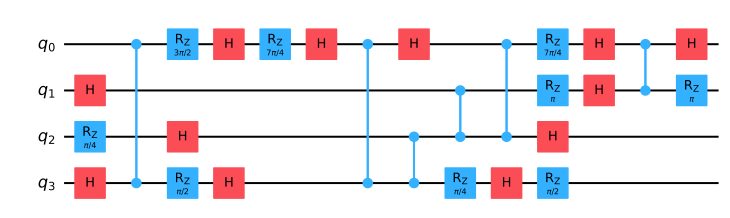

In [11]:
print(c.to_basic_gates().stats())
circuit_qiskit_aft.draw('mpl')

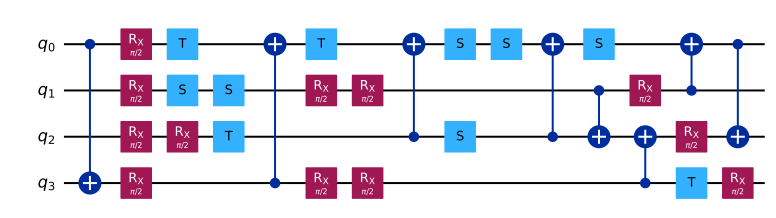

In [12]:
circuit_qiskit_bef.draw('mpl')